## 1. 데이터 불러오기
먼저 엑셀로 용산구 내의 대여소를 추출해 데이터를 일차적으로 전처리함.
- 용산구 내 따릉이 대여소 : 800-870, 4602-4639
- 서울 열린데이터 광장 사이트에서 [서울시 공공자전거 이용정보(월별)] 1-6월의 데이터를 다운받아 [대여소번호] 컬럼을 활용해 용산구 대여소를 필터링함.
(https://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do#)

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# 용산구 대여소의 1-6월 이용정보 데이터
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/hw/final_teamproject/따릉이_용산구 1-6월 이용정보.csv', encoding = 'cp949')
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,1,800,800. 목월공원 앞,단체,M,40대,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),\N,기타,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),\N,10대,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),\N,20대,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),\N,30대,5,178.77,1.51,6497.15,140


In [5]:
# 대여일자, 이동거리, 이용시간 컬럼명 바꾸기
data = data.rename(columns = {'대여일자':'월'})
data = data.rename(columns = {'이동거리(M)':'이동거리'})
data = data.rename(columns = {'이용시간(분)':'이용시간'})

In [6]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,M,40대,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),\N,기타,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),\N,10대,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),\N,20대,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),\N,30대,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,M,30대,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,M,40대,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,M,50대,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,M,60대,1,37.39,0.32,1388.41,9


In [7]:
data.info()
# 성별 내 null 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22461 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22461 non-null  int64  
 1   대여소번호   22461 non-null  int64  
 2   대여소명    22461 non-null  object 
 3   대여구분코드  22461 non-null  object 
 4   성별      19964 non-null  object 
 5   연령대코드   22461 non-null  object 
 6   이용건수    22461 non-null  int64  
 7   운동량     22461 non-null  object 
 8   탄소량     22461 non-null  object 
 9   이동거리    22461 non-null  float64
 10  이용시간    22461 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.9+ MB


In [8]:
# 성별 내 값 확인하기
# 서울 열린데이터 광장 : \N 및 공백(null) = 성별 정보 선택X
data['성별'].value_counts()

M     7157
\N    6607
F     6189
m        9
f        2
Name: 성별, dtype: int64

In [9]:
# 성별 null에 0으로 값 대체
data = data.fillna(0)

In [10]:
# 성별 컬럼의 행이 m,f이면 삭제
data = data.drop(index = data[data['성별'] == 'm'].index)
data = data.drop(index = data[data['성별'] == 'f'].index)

In [11]:
data['성별'].value_counts()

M     7157
\N    6607
F     6189
0     2497
Name: 성별, dtype: int64

In [12]:
# 공백(\N) 값을 0으로 바꾸기 
data['성별'] = data['성별'].replace(['\\N'],[0])

In [13]:
data['성별'].value_counts()

0    9104
M    7157
F    6189
Name: 성별, dtype: int64

In [14]:
# 성별 남, 여, 0 = 1, 2, 3
data['성별'] = data['성별'].replace(['M','F'],['1','2'])

In [15]:
data['성별'].value_counts()

0    9104
1    7157
2    6189
Name: 성별, dtype: int64

In [16]:
data['연령대코드'].value_counts()

20대      4415
30대      3962
40대      3505
기타       3375
50대      2786
10대      2314
60대      1623
70대이상     470
Name: 연령대코드, dtype: int64

In [17]:
# 연령대코드 값 바꾸기
data['연령대코드'] = data['연령대코드'].replace(['20대','30대', '40대', '기타', '50대', '10대', '60대', '70대이상'],['2','3','4','0','5','1','6','7'])

In [18]:
data['연령대코드'].value_counts()

2    4415
3    3962
4    3505
0    3375
5    2786
1    2314
6    1623
7     470
Name: 연령대코드, dtype: int64

In [19]:
# 이용건수, 운동량, 탄소량, 이동거리, 이용시간이 0인 값
data.query('이용건수 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [20]:
data.query('운동량 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [21]:
data.query('탄소량 == 0').count()

월         0
대여소번호     0
대여소명      0
대여구분코드    0
성별        0
연령대코드     0
이용건수      0
운동량       0
탄소량       0
이동거리      0
이용시간      0
dtype: int64

In [22]:
data.query('이동거리 == 0').count()

월         365
대여소번호     365
대여소명      365
대여구분코드    365
성별        365
연령대코드     365
이용건수      365
운동량       365
탄소량       365
이동거리      365
이용시간      365
dtype: int64

In [23]:
data.query('이용시간 == 0').count()

월         9
대여소번호     9
대여소명      9
대여구분코드    9
성별        9
연령대코드     9
이용건수      9
운동량       9
탄소량       9
이동거리      9
이용시간      9
dtype: int64

In [24]:
# 0 값 없애기
data = data.drop(index = data[data['이동거리'] == 0].index)
data = data.drop(index = data[data['이용시간'] == 0].index)

In [25]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),0,1,6,535,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,1,6,1,37.39,0.32,1388.41,9


In [26]:
# 운동량, 탄소량 변수 척도 numeric으로 변환
data['운동량'] = pd.to_numeric(data['운동량'])
data['탄소량'] = pd.to_numeric(data['탄소량'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22082 non-null  int64  
 1   대여소번호   22082 non-null  int64  
 2   대여소명    22082 non-null  object 
 3   대여구분코드  22082 non-null  object 
 4   성별      22082 non-null  object 
 5   연령대코드   22082 non-null  object 
 6   이용건수    22082 non-null  int64  
 7   운동량     22082 non-null  float64
 8   탄소량     22082 non-null  float64
 9   이동거리    22082 non-null  float64
 10  이용시간    22082 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.0+ MB


In [28]:
data.describe()

,월,대여소번호,이용건수,운동량,탄소량,이동거리,이용시간
count,22082.000000,22082.000000,22082.000000,22082.000000,22082.000000,2.208200e+04,22082.000000
mean,3.802328,1884.495834,18.719636,1779.141492,15.585047,6.717756e+04,550.408432
std,1.646822,1693.914867,34.591564,3691.986182,32.419028,1.397372e+05,1089.898382
min,1.000000,800.000000,1.000000,0.000000,0.000000,1.000000e-01,1.000000
25%,3.000000,825.000000,2.000000,162.865000,1.472500,6.363267e+03,62.000000
50%,4.000000,847.000000,6.000000,517.710000,4.550000,1.964395e+04,183.000000
75%,5.000000,4604.000000,20.000000,1717.702500,15.110000,6.514006e+04,560.000000
max,6.000000,4639.000000,662.000000,58946.650000,564.600000,2.433549e+06,23669.000000


## 2. EDA

In [29]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f382d2ac400>,
      dtype=object)

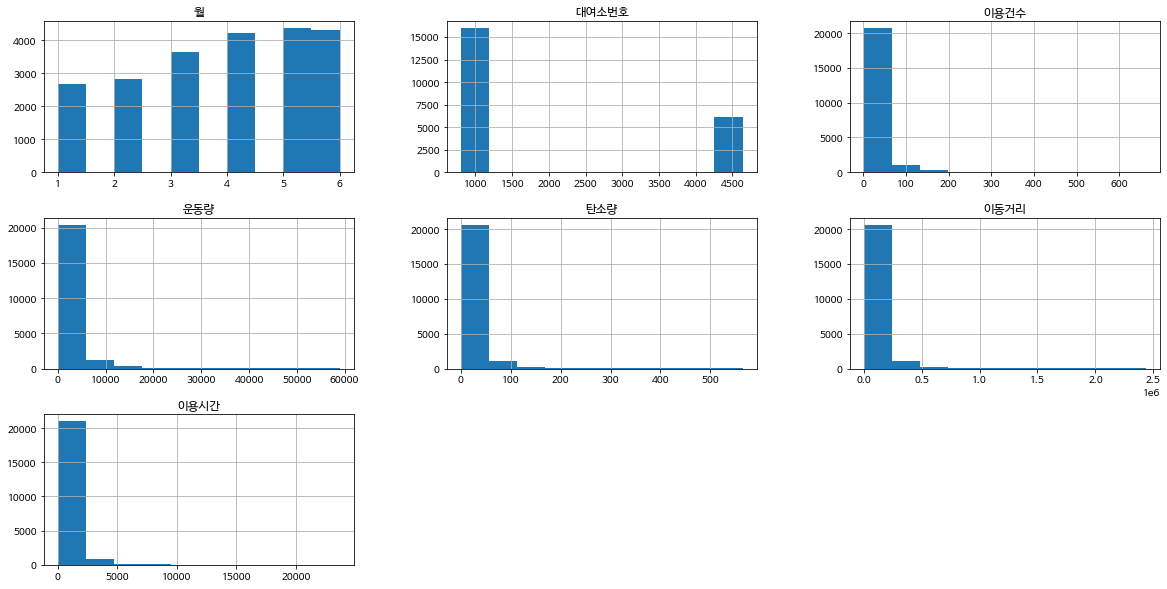

In [30]:
# histogram
pd.DataFrame(data).hist(figsize=(20,10))

In [31]:
data_month = data.groupby('월').agg(sum = ('이용건수', 'sum'))
data_month

,sum
월,
1,25803
2,26329
3,53111
4,94039
5,117726
6,96359


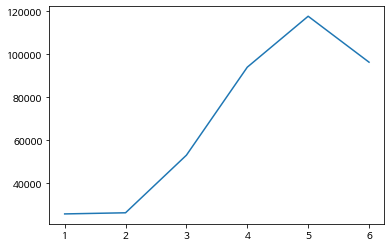

In [32]:
# 월별 이용건수 합 시각화 : 4월부터 이용수 많아짐
plt.plot(data_month)

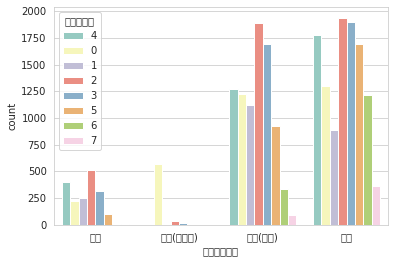

In [33]:
# 연령대별 대여구분코드 확인
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(data = data, x="대여구분코드", hue = "연령대코드", palette='Set3')

In [34]:
# 더 시각화하기

## 3. 데이터 스케일링

In [35]:
data

,월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,단체,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,일일(비회원),0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,일일(회원),0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,일일(회원),0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,일일(회원),0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,정기,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,정기,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,정기,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,정기,1,6,1,37.39,0.32,1388.41,9


In [36]:
data['대여구분코드'].value_counts()

정기         11077
일일(회원)      8557
단체          1817
일일(비회원)      631
Name: 대여구분코드, dtype: int64

In [37]:
# 대여구분코드 변수 바꾸기
# 대여구분코드 : 0=단체, 1=일일(비회원), 2=일일(회원), 3=정기
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['대여구분코드'])
labels = encoder.transform(data['대여구분코드'])
print(labels)

[0 1 2 ... 3 3 3]


In [38]:
data_new = data.insert(4, '대여구분', labels)

In [39]:
data_new = data.drop(['대여구분코드'], axis=1)
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [40]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22082 non-null  int64  
 1   대여소번호   22082 non-null  int64  
 2   대여소명    22082 non-null  object 
 3   대여구분    22082 non-null  int64  
 4   성별      22082 non-null  object 
 5   연령대코드   22082 non-null  object 
 6   이용건수    22082 non-null  int64  
 7   운동량     22082 non-null  float64
 8   탄소량     22082 non-null  float64
 9   이동거리    22082 non-null  float64
 10  이용시간    22082 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.5+ MB


In [41]:
data_new['성별'] = pd.to_numeric(data['성별'])

In [42]:
X = data_new[['월', '대여소번호', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data_new['성별']

In [43]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16561, 8) (5521, 8) (16561,) (5521,)


## 4. KNN

### Grid Search

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [47]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 3}


In [48]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.461


In [49]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.460


In [50]:
result_grid= pd.DataFrame(grid_search.cv_results_)

### Random Search

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [52]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3824ad55b0>},
                   return_train_score=True)

In [53]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 1}
Best Cross-validity Score: 0.448
Test set Score: 0.458


In [54]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026561,0.000783,0.123970,0.015525,9,{'n_neighbors': 9},0.434953,0.441425,0.448068,0.451087,...,0.442788,0.005987,5,0.581446,0.581402,0.579817,0.580874,0.582006,0.581109,0.000739
1,0.026102,0.000327,0.104751,0.004462,9,{'n_neighbors': 9},0.434953,0.441425,0.448068,0.451087,...,0.442788,0.005987,5,0.581446,0.581402,0.579817,0.580874,0.582006,0.581109,0.000739
2,0.028128,0.002657,0.110594,0.003784,11,{'n_neighbors': 11},0.430727,0.442633,0.447766,0.446558,...,0.441399,0.006114,8,0.563255,0.563061,0.565401,0.563590,0.561778,0.563417,0.001167
3,0.025723,0.000361,0.104341,0.002130,9,{'n_neighbors': 9},0.434953,0.441425,0.448068,0.451087,...,0.442788,0.005987,5,0.581446,0.581402,0.579817,0.580874,0.582006,0.581109,0.000739
4,0.027424,0.003721,0.104031,0.005965,2,{'n_neighbors': 2},0.439179,0.439312,0.440821,0.423913,...,0.434575,0.006642,10,0.720033,0.719677,0.719375,0.721866,0.718847,0.719960,0.001029
5,0.027942,0.003451,0.120227,0.044965,1,{'n_neighbors': 1},0.451856,0.450181,0.446256,0.445954,...,0.447980,0.002544,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.027483,0.002000,0.108064,0.007762,7,{'n_neighbors': 7},0.440688,0.446558,0.452899,0.452597,...,0.447377,0.004767,3,0.605752,0.608121,0.600649,0.605329,0.605329,0.605036,0.002427
7,0.026762,0.000251,0.111805,0.005460,11,{'n_neighbors': 11},0.430727,0.442633,0.447766,0.446558,...,0.441399,0.006114,8,0.563255,0.563061,0.565401,0.563590,0.561778,0.563417,0.001167
8,0.027342,0.001116,0.106626,0.004540,6,{'n_neighbors': 6},0.437972,0.447464,0.451993,0.456522,...,0.447498,0.006451,2,0.615338,0.619217,0.616952,0.618990,0.618764,0.617852,0.001491
9,0.026973,0.000505,0.111095,0.009471,7,{'n_neighbors': 7},0.440688,0.446558,0.452899,0.452597,...,0.447377,0.004767,3,0.605752,0.608121,0.600649,0.605329,0.605329,0.605036,0.002427


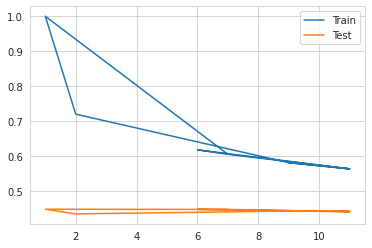

In [55]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

### 모델평가

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn_best=KNeighborsClassifier(n_neighbors=8)

In [58]:
knn_best.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
pred_train=knn_best.predict(X_train) 
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[4901 1110  682]
 [2127 2896  288]
 [1964  529 2064]]


In [59]:
pred_test=knn_best.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)


테스트데이터 오차행렬:
 [[1310  566  356]
 [ 956  690  124]
 [ 858  223  438]]


In [60]:
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report
# f1=f1_score(y_test, pred_test)
# print("f1 score:", f1,'\n')
# cfreport=classification_report(y_test, pred_test)
# print("분류예측 레포트:\n", cfreport)

## 5. Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# 완전 과적합

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.509


In [63]:
# 과적합 낮추기 위해 max_depth 적용
tree = DecisionTreeClassifier(max_depth = 6, random_state = 0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test))) # 정확도 증가함

학습용 데이터 정확도: 0.458
시험용 데이터 정확도: 0.421


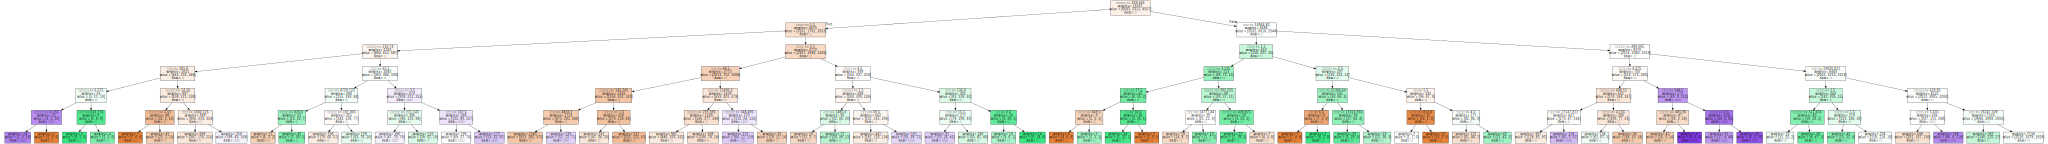

In [64]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
# feature_names 머지
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file = "tree.dot", class_names = [ "남", "여", "미기입"],
                feature_names = data_new.columns[1:9], 
                impurity = False, filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [65]:
# 변수의 중요도 구하기
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.03280402 0.00885981 0.13735948 0.01955759 0.38669646 0.09622459
 0.22329697 0.09520108]


In [66]:
# 변수의 중요도 시각화
import numpy as np
# def plot_feature_importances_df_new(model):
    #plt.rcParams["figure.figsize"] = (9,6)
    #n_features = len(data_new.columns[1:])  # 30개 
    #plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    #plt.yticks(np.arange(n_features), data_new.columns[1:])
    #plt.xlabel("feature importance")
    #plt.ylabel("feature")
    #plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

# plot_feature_importances_df_new(tree)

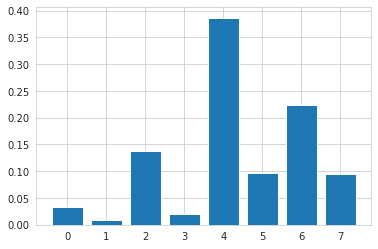

In [67]:
x = np.arange(8)
values = [0.03280402, 0.00885981, 0.13735948, 0.01955759, 0.38669646, 0.09622459, 0.22329697, 0.09520108]
plt.bar(x, values)
plt.show()

## 6. Random forest

### Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators' : [10, 100], 
            'max_depth' : [6, 8, 10, 12]}
from sklearn.ensemble import RandomForestClassifier
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [69]:
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'n_estimators': 100}
Best Cross-validity Score: 0.549
Test set Score: 0.540


In [70]:
result_grid= pd.DataFrame(grid_search.cv_results_)

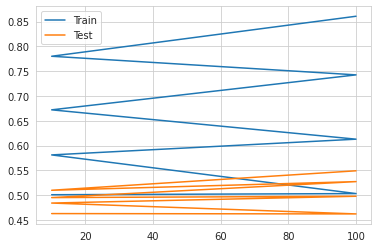

In [71]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=1, high=10), 
                  'max_depth' : [6, 8, 10, 12]}

In [73]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [6, 8, 10, 12],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f38233cd9d0>},
                   return_train_score=True)

In [74]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'n_estimators': 9}
Best Cross-validity Score: 0.512
Test set Score: 0.508


In [75]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113807,0.005322,0.033162,0.049896,10,6,"{'max_depth': 10, 'n_estimators': 6}",0.487172,0.509360,0.494263,...,0.492422,0.009049,5,0.654514,0.654842,0.646841,0.654842,0.665333,0.655274,0.005886
1,0.179298,0.007340,0.010918,0.000254,12,9,"{'max_depth': 12, 'n_estimators': 9}",0.522487,0.508152,0.513587,...,0.511563,0.006178,1,0.786911,0.752585,0.764888,0.770247,0.787682,0.772463,0.013400
2,0.083495,0.003858,0.008132,0.001128,8,5,"{'max_depth': 8, 'n_estimators': 5}",0.475098,0.474034,0.470411,...,0.469959,0.006750,7,0.567406,0.538003,0.547362,0.548192,0.550608,0.550314,0.009560
3,0.076861,0.011512,0.008559,0.001966,12,3,"{'max_depth': 12, 'n_estimators': 3}",0.472985,0.467693,0.462862,...,0.461022,0.012277,8,0.681235,0.672051,0.647596,0.637558,0.685335,0.664755,0.018881
4,0.042384,0.002983,0.009292,0.001888,8,1,"{'max_depth': 8, 'n_estimators': 1}",0.416843,0.443539,0.446256,...,0.434093,0.010468,10,0.456824,0.476413,0.469922,0.464865,0.466148,0.466835,0.006416
5,0.211709,0.004904,0.014084,0.000708,12,7,"{'max_depth': 12, 'n_estimators': 7}",0.498944,0.503925,0.509964,...,0.500151,0.007038,2,0.756643,0.749340,0.745037,0.746924,0.761416,0.751872,0.006188
6,0.228274,0.005567,0.014100,0.000127,10,9,"{'max_depth': 10, 'n_estimators': 9}",0.503471,0.511775,0.485809,...,0.497192,0.010228,3,0.670743,0.664578,0.676202,0.684882,0.663673,0.672016,0.007869
7,0.119371,0.013632,0.010488,0.000171,10,4,"{'max_depth': 10, 'n_estimators': 4}",0.475098,0.484903,0.480978,...,0.479259,0.004824,6,0.633228,0.625481,0.635520,0.614537,0.611065,0.623966,0.009766
8,0.149104,0.020800,0.011029,0.002689,12,7,"{'max_depth': 12, 'n_estimators': 7}",0.506791,0.506944,0.475242,...,0.496286,0.011922,4,0.748868,0.754397,0.738848,0.758170,0.748509,0.749758,0.006537
9,0.055502,0.000944,0.006395,0.000091,6,4,"{'max_depth': 6, 'n_estimators': 4}",0.457591,0.461655,0.450785,...,0.452629,0.006199,9,0.483696,0.494754,0.491358,0.491358,0.483357,0.488905,0.004564


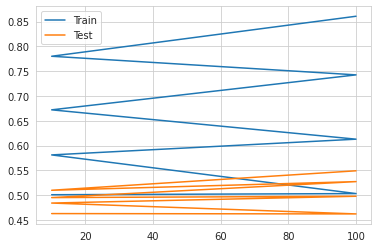

In [76]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [77]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.05129589 0.09986706 0.08827728 0.08150447 0.23813689 0.14383373
 0.16428451 0.13280018]


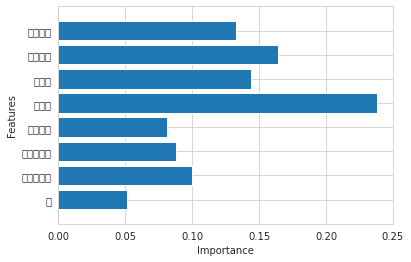

In [78]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

In [79]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_depth = 12, n_estimators = 6)
Forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [80]:
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[5518  770  405]
 [1346 3722  243]
 [1455  403 2699]]


In [81]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[1335  518  379]
 [ 725  871  174]
 [ 752  237  530]]


## 20, 30대 추출

In [108]:
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [109]:
data2030 = data_new.query('연령대코드 in ["2","3"]')
data2030

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
8,1,800,800. 목월공원 앞,2,2,3,5,609.95,5.96,25690.59,247
10,1,800,800. 목월공원 앞,2,1,2,5,118.95,0.83,3624.63,47
11,1,800,800. 목월공원 앞,2,1,3,6,466.63,3.93,16909.32,216
...,...,...,...,...,...,...,...,...,...,...,...
22444,6,4639,4639. 동빙고근린공원,3,0,3,1,25.15,0.29,1270.00,6
22448,6,4639,4639. 동빙고근린공원,3,2,2,24,3714.37,34.63,149361.58,1036
22449,6,4639,4639. 동빙고근린공원,3,2,3,7,962.48,9.18,39560.06,249
22455,6,4639,4639. 동빙고근린공원,3,1,2,14,1871.47,15.01,64748.87,504


In [84]:
data2030_use = data2030.groupby('대여소번호').agg(sum_use = ('이용건수', 'sum'))
data2030_use

,sum_use
대여소번호,
800,3747
802,1640
803,535
805,3830
806,3244
...,...
4634,2163
4636,328
4637,90


In [85]:
data2030_use.sort_values('sum_use', ascending = False)

,sum_use
대여소번호,
853,14704
870,11784
825,8797
829,7941
837,7623
...,...
859,310
865,300
4639,187


In [86]:
data2030.query('대여소번호 == 853').head(1)

,월,대여소번호,대여소명,대여구분코드,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
1656,1,853,853.용산역 맞은편,단체,0,1,2,2,79.8,0.71,3053.13,18


In [87]:
data2030.query('대여소번호 == 870').head(1)

,월,대여소번호,대여소명,대여구분코드,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
2080,1,870,870.노들섬 서측 앞,단체,0,0,2,2,45.62,0.46,1986.06,38


In [88]:
data2030.query('대여소번호 == 825').head(1)

,월,대여소번호,대여소명,대여구분코드,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
687,1,825,825. 서빙고동 주민센터 앞,단체,0,0,2,1,319.71,2.88,12420.76,94


In [89]:
data2030.query('대여소번호 == 829').head(1)

,월,대여소번호,대여소명,대여구분코드,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
838,1,829,829. 베르가모앞,단체,0,1,3,1,94.09,0.92,3960.0,29


In [90]:
data2030.query('대여소번호 == 837').head(1)

,월,대여소번호,대여소명,대여구분코드,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
1115,1,837,837. 한남나들목 입구,일일(비회원),1,0,2,1,114.37,1.03,4443.11,39


In [92]:
data2030['대여구분코드'].value_counts()
# 정기 > 일일(회원) > 단체 > 일일(비회원)
# 정기권과 일일(회원)권 차이가 별로 없다.

정기         3832
일일(회원)     3588
단체          825
일일(비회원)      55
Name: 대여구분코드, dtype: int64

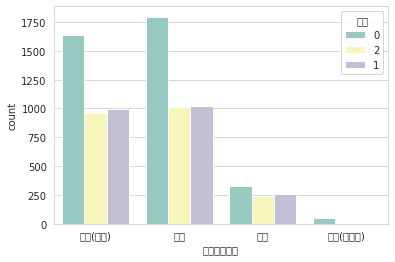

In [94]:
# 성별 대여구분코드 차이 확인
sns.countplot(data = data2030, x="대여구분코드", hue = "성별", palette='Set3')

In [101]:
# 20,30대 월별 이용시간 평균 구하기
data2030.groupby('월').agg(mean_use = ('이용시간', 'mean'))

,mean_use
월,
1,285.713242
2,303.973661
3,614.958515
4,1133.772582
5,1393.129653
6,1031.789574


In [106]:
[285.713 / 60, 303.973 / 60, 614.958 / 60, 1133.772 / 60, 1393.129 / 60, 1031.789 / 60]
# 확실히 4월부터 이용시간 많아짐

[4.7618833333333335,
 5.066216666666667,
 10.2493,
 18.8962,
 23.218816666666665,
 17.196483333333333]

## 전체 데이터에서 20,30대 예측해보기

In [110]:
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9


In [111]:
data_new['연령구분'] = data_new['연령대코드'].apply(lambda x: x in ['2','3'])
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,False
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,False
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,False
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,True
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344,True
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566,False
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459,False
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9,False


In [112]:
data_new['연령구분'] = data_new['연령구분'].replace([True,False],[1,0])

In [113]:
data_new

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,1,800,800. 목월공원 앞,0,1,4,2,176.71,1.38,5949.60,120,0
1,1,800,800. 목월공원 앞,1,0,0,2,120.28,1.08,4672.74,58,0
2,1,800,800. 목월공원 앞,2,0,1,6,535.00,4.34,18764.02,570,0
3,1,800,800. 목월공원 앞,2,0,2,14,1097.91,9.42,40631.75,379,1
4,1,800,800. 목월공원 앞,2,0,3,5,178.77,1.51,6497.15,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22456,6,4639,4639. 동빙고근린공원,3,1,3,8,686.79,5.67,24405.69,344,1
22457,6,4639,4639. 동빙고근린공원,3,1,4,15,2900.89,22.47,96820.20,566,0
22458,6,4639,4639. 동빙고근린공원,3,1,5,9,1600.71,14.41,62087.24,459,0
22459,6,4639,4639. 동빙고근린공원,3,1,6,1,37.39,0.32,1388.41,9,0


In [114]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 0 to 22460
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       22082 non-null  int64  
 1   대여소번호   22082 non-null  int64  
 2   대여소명    22082 non-null  object 
 3   대여구분    22082 non-null  int64  
 4   성별      22082 non-null  int64  
 5   연령대코드   22082 non-null  object 
 6   이용건수    22082 non-null  int64  
 7   운동량     22082 non-null  float64
 8   탄소량     22082 non-null  float64
 9   이동거리    22082 non-null  float64
 10  이용시간    22082 non-null  int64  
 11  연령구분    22082 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 2.7+ MB


In [115]:
# 랜덤하게 예측에 사용할 데이터 추출
data_pred = data_new.sample(n=200)
data_pred

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
6038,3,807,807. 서울역 12번 출구 앞,3,0,0,1,72.64,0.71,3057.37,33,0
2369,1,4611,4611. 국제루터교회 앞,2,2,2,1,11.76,0.13,550.00,4,1
3080,2,808,808. 서빙고동 금호맨션 앞,2,1,3,4,300.82,2.71,11686.77,134,1
4364,2,847,847. 국방부민원실옆,2,1,3,3,929.02,6.85,29554.27,155,1
12981,4,4612,4612. 한남 준 J.FSS 앞,2,0,3,8,549.90,4.73,20415.13,190,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11882,4,852,852.청암자이APT(103동),3,0,2,11,1021.39,8.86,38193.61,250,1
5588,2,4622,4622. 한강중학교 앞 버스정류장,2,1,0,2,50.19,0.45,1950.00,14,0
15413,5,836,836. 현대자동차서비스 앞,3,1,4,104,22747.73,161.60,696761.89,3933,0
1363,1,844,844. 이촌2동 동원베네스트 아파트 앞,2,2,5,1,35.93,0.35,1512.05,15,0


In [116]:
# csv 파일로 저장
data_new.to_csv("data.csv", index = False, encoding = "utf-8-sig")

In [117]:
# csv 파일로 저장 : data_pred
data_pred.to_csv("data_pred.csv", index = False, encoding = "utf-8-sig")

### KNN

In [118]:
X = data_new[['월', '대여소번호', '대여구분', '성별', '이용건수', '운동량', '탄소량', '이동거리', '이용시간']]
y = data_new['연령구분']

In [119]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [120]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16561, 9) (5521, 9) (16561,) (5521,)


Random search

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint # 통계 라이브러리
from sklearn.neighbors import KNeighborsClassifier

# 랜덤 서치로 n_neighbors 1~50까지 넒게 봄
param_distribs = {'n_neighbors': randint(low=1, high=50)}
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True, n_iter=20, random_state=1);
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f38223d59a0>},
                   random_state=1, return_train_score=True)

In [128]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 46}
Best Cross-validity Score: 0.656
Test set Score: 0.652


In [129]:
result_random = pd.DataFrame(random_search.cv_results_)
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020820,0.000671,0.126405,0.005031,38,{'n_neighbors': 38},0.652279,0.650362,0.654287,0.657911,...,0.655033,0.003640,3,0.670969,0.674768,0.670315,0.672504,0.667371,0.671185,0.002446
1,0.021240,0.002313,0.134297,0.007809,44,{'n_neighbors': 44},0.652883,0.653080,0.653986,0.656401,...,0.655093,0.002370,2,0.667195,0.671296,0.669786,0.670541,0.668050,0.669374,0.001531
2,0.020589,0.000625,0.119599,0.009660,13,{'n_neighbors': 13},0.639602,0.631643,0.626208,0.623792,...,0.632329,0.006765,15,0.692331,0.690845,0.692581,0.692958,0.687599,0.691263,0.001967
3,0.020677,0.000316,0.104885,0.003244,9,{'n_neighbors': 9},0.635678,0.626208,0.625906,0.627415,...,0.629491,0.003842,17,0.707126,0.708204,0.710997,0.707902,0.704431,0.707732,0.002106
4,0.021542,0.001955,0.112115,0.009048,10,{'n_neighbors': 10},0.640507,0.639493,0.632850,0.635266,...,0.637763,0.003147,12,0.697539,0.698996,0.701940,0.699298,0.696053,0.698765,0.001964
5,0.020863,0.000900,0.111831,0.009976,12,{'n_neighbors': 12},0.646242,0.638889,0.631944,0.632548,...,0.638669,0.005755,11,0.690444,0.694543,0.694166,0.692430,0.686618,0.691640,0.002901
6,0.021803,0.002033,0.110131,0.011019,6,{'n_neighbors': 6},0.636885,0.630737,0.627717,0.633454,...,0.634080,0.004828,14,0.718297,0.720583,0.724130,0.719828,0.716884,0.719944,0.002450
7,0.020519,0.000278,0.111289,0.004060,16,{'n_neighbors': 16},0.643224,0.644626,0.639493,0.641908,...,0.644104,0.003961,9,0.683197,0.682769,0.685637,0.684957,0.682618,0.683836,0.001227
8,0.020085,0.000499,0.112332,0.030080,1,{'n_neighbors': 1},0.567763,0.565217,0.573068,0.571860,...,0.572128,0.006003,20,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.020051,0.000265,0.110393,0.002190,17,{'n_neighbors': 17},0.646544,0.637681,0.633756,0.641908,...,0.641084,0.004807,10,0.681386,0.683901,0.687675,0.686165,0.682844,0.684394,0.002262


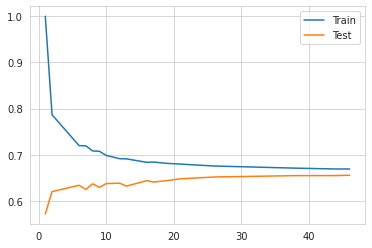

In [130]:
import matplotlib.pyplot as plt

result_random = result_random.sort_values('param_n_neighbors') # 그래프 x축 순서대로 그려지게
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

# 10 부근이 정확도가 제일 높음 -> 그리드 서치에서 1~20 구간을 돌려봄

Grid search

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': list(range(40,60))}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                                         50, 51, 52, 53, 54, 55, 56, 57, 58,
                                         59]},
             return_train_score=True)

In [152]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 58}


In [153]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.659


In [154]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.653


In [155]:
result_grid= pd.DataFrame(grid_search.cv_results_)
print(result_grid)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.023921      0.003728         0.174159        0.057942   
1        0.020770      0.000508         0.129280        0.005817   
2        0.021959      0.002329         0.133542        0.010896   
3        0.019900      0.000315         0.123206        0.001221   
4        0.020392      0.000378         0.130606        0.008322   
5        0.020542      0.000896         0.126943        0.003658   
6        0.022128      0.002757         0.127664        0.003374   
7        0.022232      0.003096         0.151067        0.043802   
8        0.022185      0.002525         0.148436        0.037034   
9        0.020170      0.000303         0.127246        0.002378   
10       0.019943      0.000183         0.127969        0.001781   
11       0.020448      0.000484         0.129176        0.002475   
12       0.021321      0.001283         0.132914        0.005138   
13       0.020481      0.000715         0.135434

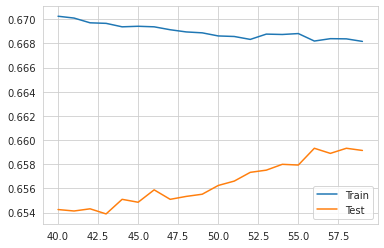

In [156]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [157]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=58)
knn.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
pred_train=knn.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

pred_test=knn.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)
print('*** Test Accuracy *** \n   {}'.format(knn.score(X_test, y_test)))

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

## 최종 모델 정확도 0.65

훈련데이터 오차행렬:
 [[9164 1172]
 [4315 1910]]
테스트데이터 오차행렬:
 [[2989  457]
 [1460  615]]
*** Test Accuracy *** 
   0.6527802934251041
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76      3446
           1       0.57      0.30      0.39      2075

    accuracy                           0.65      5521
   macro avg       0.62      0.58      0.57      5521
weighted avg       0.63      0.65      0.62      5521



In [158]:
f1 = f1_score(y_test, pred_test)
print(f1)

0.39084842707340317


In [164]:
data_pred = data_pred.drop(['연령구분', '대여소명', '연령대코드'], axis = 1)
data_pred

,월,대여소번호,대여구분,성별,이용건수,운동량,탄소량,이동거리,이용시간
6038,3,807,3,0,1,72.64,0.71,3057.37,33
2369,1,4611,2,2,1,11.76,0.13,550.00,4
3080,2,808,2,1,4,300.82,2.71,11686.77,134
4364,2,847,2,1,3,929.02,6.85,29554.27,155
12981,4,4612,2,0,8,549.90,4.73,20415.13,190
...,...,...,...,...,...,...,...,...,...
11882,4,852,3,0,11,1021.39,8.86,38193.61,250
5588,2,4622,2,1,2,50.19,0.45,1950.00,14
15413,5,836,3,1,104,22747.73,161.60,696761.89,3933
1363,1,844,2,2,1,35.93,0.35,1512.05,15


In [174]:
data_pred_result = knn.predict(data_pred)

In [175]:
data_pred_result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [169]:
ulr2 = "https://raw.githubusercontent.com/ABChaeeun/ITB_Project/main/data/data_pred.csv"
data_result = pd.read_csv(ulr2)
data_result

,월,대여소번호,대여소명,대여구분,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간,연령구분
0,3,807,807. 서울역 12번 출구 앞,3,0,0,1,72.64,0.71,3057.37,33,0
1,1,4611,4611. 국제루터교회 앞,2,2,2,1,11.76,0.13,550.00,4,1
2,2,808,808. 서빙고동 금호맨션 앞,2,1,3,4,300.82,2.71,11686.77,134,1
3,2,847,847. 국방부민원실옆,2,1,3,3,929.02,6.85,29554.27,155,1
4,4,4612,4612. 한남 준 J.FSS 앞,2,0,3,8,549.90,4.73,20415.13,190,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,852,852.청암자이APT(103동),3,0,2,11,1021.39,8.86,38193.61,250,1
196,2,4622,4622. 한강중학교 앞 버스정류장,2,1,0,2,50.19,0.45,1950.00,14,0
197,5,836,836. 현대자동차서비스 앞,3,1,4,104,22747.73,161.60,696761.89,3933,0
198,1,844,844. 이촌2동 동원베네스트 아파트 앞,2,2,5,1,35.93,0.35,1512.05,15,0


In [172]:
data_result = data_result.drop(['월','대여소번호','대여소명','대여구분','성별','연령대코드','이용건수','운동량','탄소량','이동거리','이용시간'], axis = 1)

In [173]:
data_result

,연령구분
0,0
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


In [178]:
data_pred_result = pd.DataFrame(data_pred_result)

In [179]:
data_pred_result

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,0


In [192]:
data_pred_result = data_pred_result.rename(columns = {0:'예측'})

In [193]:
data_final = pd.concat([data_result, data_pred_result], axis=1)
data_final

,연령구분,예측
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,0,0
197,0,1
198,0,0


In [195]:
data_final['차이'] = data_final['연령구분'] - data_final['예측']
data_final

,연령구분,예측,차이
0,0,0,0
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
195,1,0,1
196,0,0,0
197,0,1,-1
198,0,0,0


In [197]:
len(data_final[data_final['차이'] == 0]) / len(data_final)

0.645